# Problem Statement
Classifying the person as male or female based on following parameter :
1. long_hair - This columns contains 0's and 1's where 1 is "long hair" and 0 is "not long hair".
2. forehead_width_cm - This column is in CM's. This is the width of the forehead.
3. forehead_height_cm - This is the height of the forehead and it's in Cm's.
4. nose_wide - This column contains 0's and 1's where 1 is "wide nose" and 0 is "not wide nose".
5. nose_long - This column contains 0's and 1's where 1 is "Long nose" and 0 is "not long nose".
6. lips_thin - This column contains 0's and 1's where 1 represents the "thin lips" while 0 is "Not thin lips".
7. distance_nose_to_lip_long - This column contains 0's and 1's where 1 represents the "long distance between nose and lips" while 0 is "short distance between nose and lips".

8. gender(Output variable) - This is either "Male" or "Female".

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import all required Libraries

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve

## Import the Dataset

In [ ]:
gender = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/gender classification/gender_classification_v7.csv')

In [ ]:
gender.shape

(5001, 8)

In [ ]:
gender.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [ ]:
gender.tail()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female
5000,1,15.4,5.4,1,1,1,1,Male


In [ ]:
gender.sample(6)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
4426,1,13.0,6.5,0,0,0,0,Female
4139,1,12.5,5.6,0,0,1,0,Female
4790,1,12.6,5.2,0,0,0,0,Female
3278,1,12.8,5.6,0,0,0,0,Female
60,1,13.3,5.5,0,0,1,0,Female
986,1,12.8,6.2,1,1,1,1,Male


In [ ]:
gender.describe(include = 'all')

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2501
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900,NaN
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049,NaN
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000,NaN
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000,NaN
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000,NaN
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000,NaN


In [ ]:
gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


## EDA

In [ ]:
g = gender.copy()     #made a copy because I don't want to make the following changes in original dataset

In [ ]:
cat_var = ['long_hair', 'nose_wide', 'nose_long',	'lips_thin',	'distance_nose_to_lip_long']
num_var = ['forehead_width_cm', 'forehead_height_cm']

In [ ]:
g[cat_var] = g[cat_var].astype('category')

In [ ]:
g.dtypes

long_hair                    category
forehead_width_cm             float64
forehead_height_cm            float64
nose_wide                    category
nose_long                    category
lips_thin                    category
distance_nose_to_lip_long    category
gender                         object
dtype: object

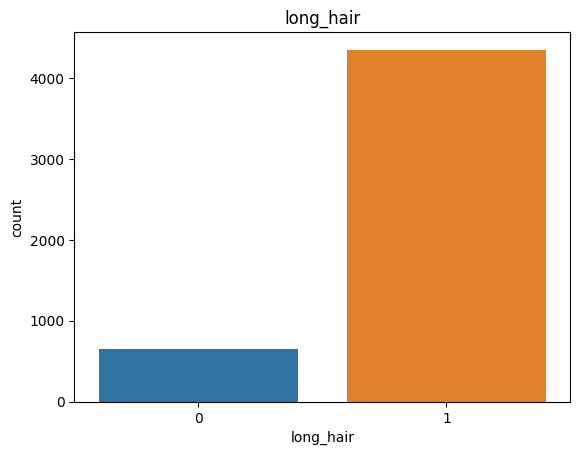

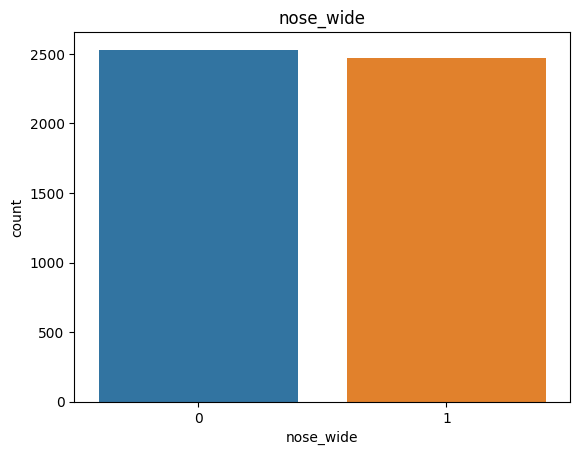

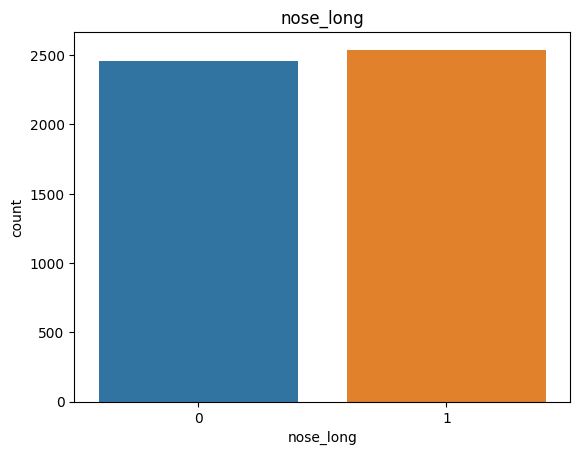

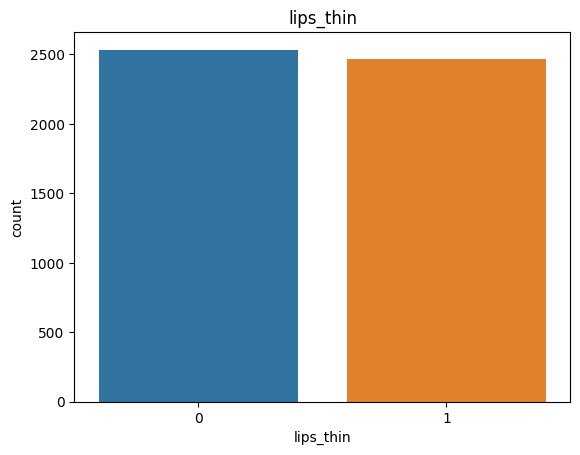

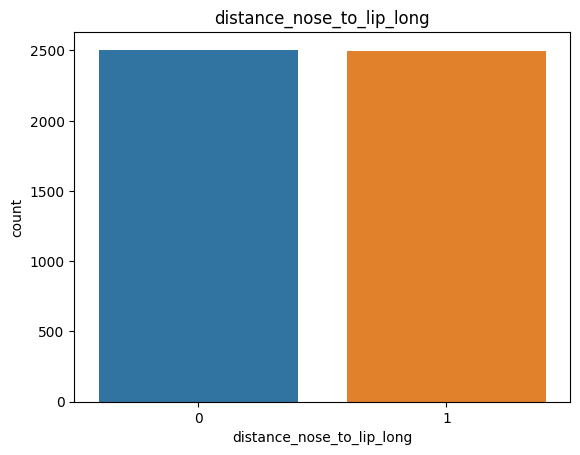

In [ ]:
for i in cat_var:
  plt.title(i)
  sns.countplot(x=i, data = g)
  plt.show()

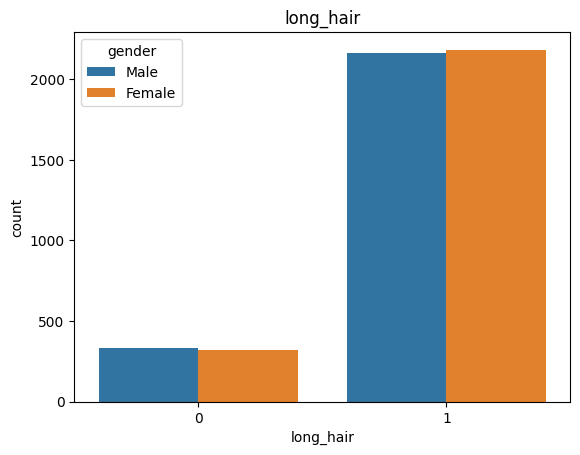

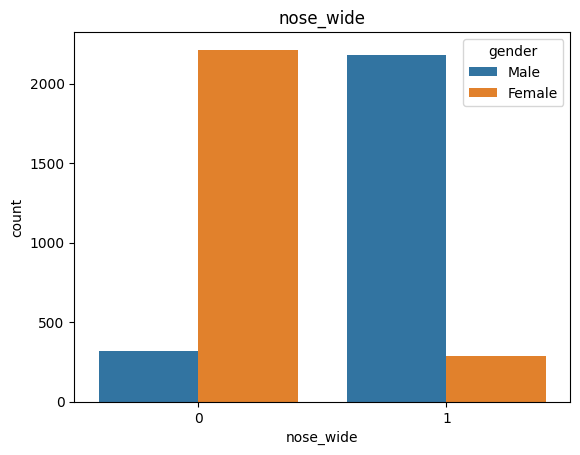

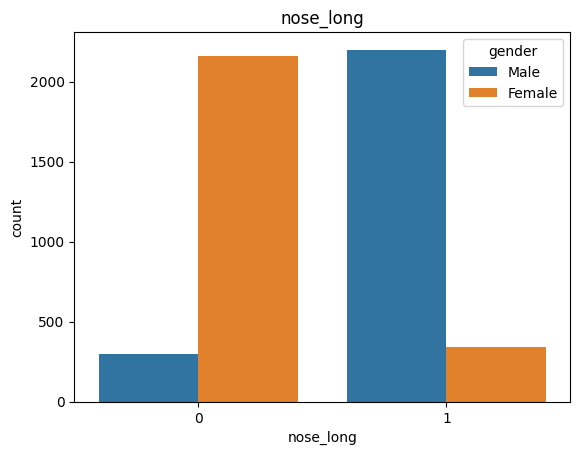

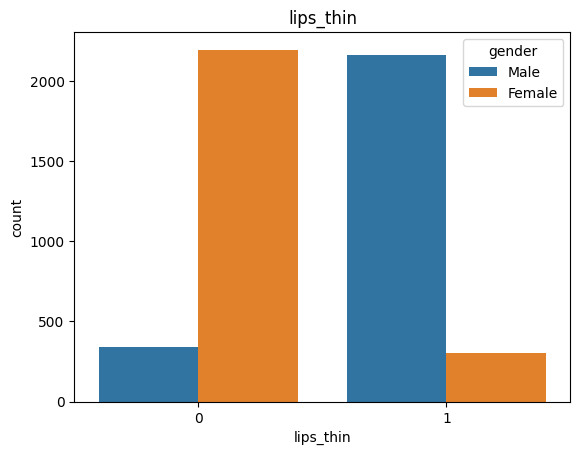

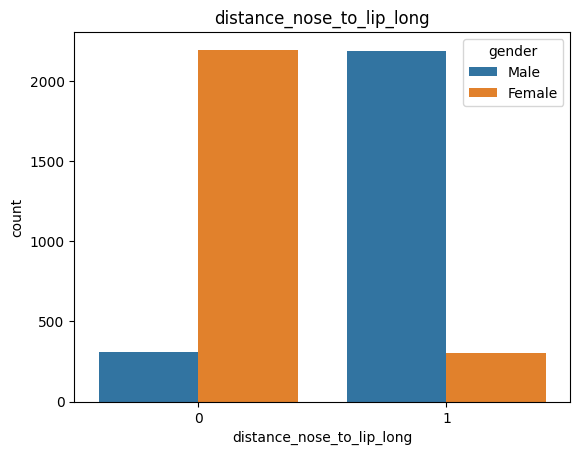

In [ ]:
for i in cat_var:
  plt.title(i)
  sns.countplot(x=i, data = g, hue = g.gender)
  plt.show()

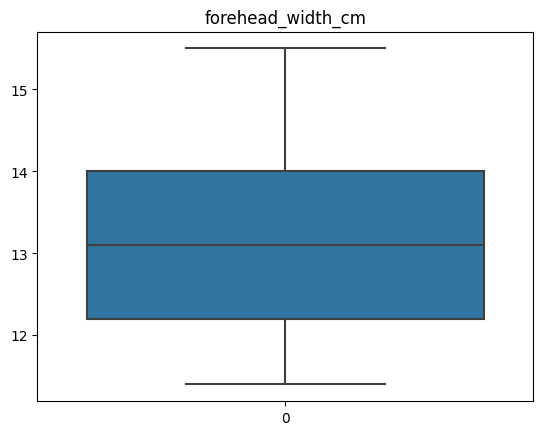

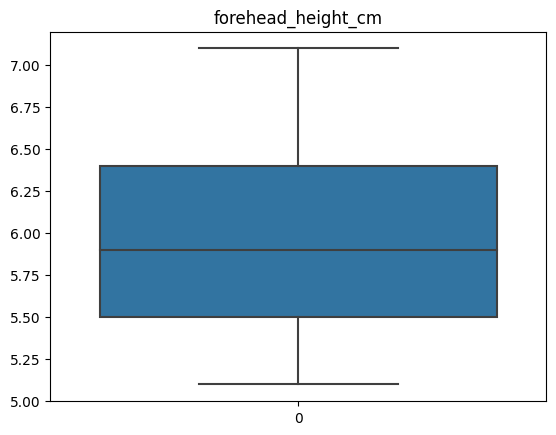

In [ ]:
for j in num_var:
  plt.title(j)
  sns.boxplot(g[j])
  plt.show()

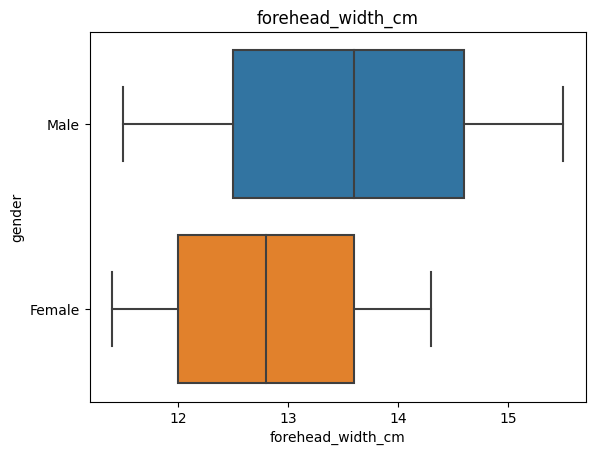

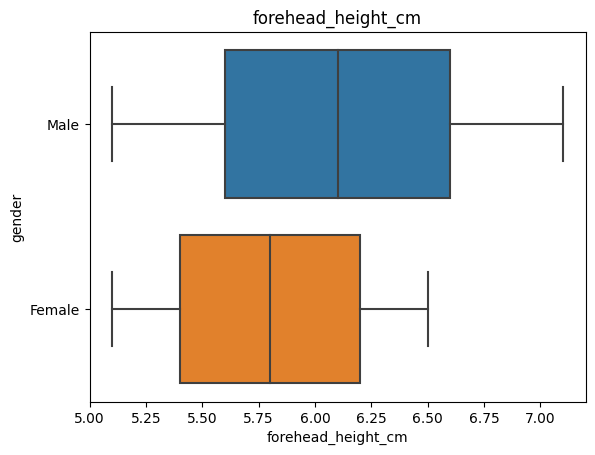

In [ ]:
for j in num_var:
  plt.title(j)
  sns.boxplot(x = g[j], y = g.gender)
  plt.show()

### Output variable

<Axes: xlabel='gender', ylabel='count'>

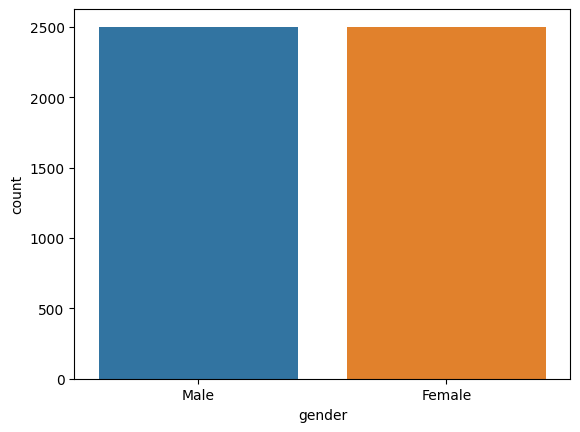

In [ ]:
sns.countplot(x= 'gender', data = g)

In [ ]:
g['gender'].value_counts()

Female    2501
Male      2500
Name: gender, dtype: int64

## Preprocessing

In [ ]:
gender.isna().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [ ]:
gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [ ]:
gender['gender']=gender['gender'].map({'Female':0, 'Male':1})

In [ ]:
gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 312.7 KB


In [ ]:
gender.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


## train-test split

In [ ]:
X = gender.drop(['gender'], axis=1)
y =gender['gender']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 78, stratify= y)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3500, 7)
(1501, 7)
(3500,)
(1501,)


In [ ]:
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

      long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
1332          1               12.1                 6.3          1          1   
3636          1               13.9                 6.5          0          0   
1295          1               14.9                 6.1          1          1   
361           1               13.8                 5.5          0          0   
2381          0               14.9                 5.3          1          1   

      lips_thin  distance_nose_to_lip_long  
1332          0                          0  
3636          0                          0  
1295          1                          1  
361           1                          1  
2381          1                          0  
      long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
1383          1               14.1                 6.1          0          0   
875           1               13.1                 6.1          0          0   
4157     

## model Training

### evaluation matrix

In [ ]:
def eval_metric(y_train, y_train_pred, y_test, y_test_pred):
  print("The train accuracy score is",accuracy_score(y_train,y_train_pred))
  print("The test accuracy score is",accuracy_score(y_test,y_test_pred))
  print(''' --------------------------------------------
                Train Report
-------------------------------------------- ''')
  print("The confusion matrix  is\n",confusion_matrix(y_train,y_train_pred))
  print("The classification report is\n",classification_report(y_train,y_train_pred))
  print(''' --------------------------------------------
                Test Report
-------------------------------------------- ''')
  print("The confusion matrix  is\n",confusion_matrix(y_test,y_test_pred))
  print("The classification report  is\n",classification_report(y_test,y_test_pred))

### Logistic regression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

lr_train_pred = lr.predict(X_train)
lr_test_pred = lr.predict(X_test)

eval_metric(y_train, lr_train_pred, y_test, lr_test_pred)

The train accuracy score is 0.9697142857142858
The test accuracy score is 0.9686875416389074
 --------------------------------------------
                Train Report
-------------------------------------------- 
The confusion matrix  is
 [[1698   52]
 [  54 1696]]
The classification report is
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1750
           1       0.97      0.97      0.97      1750

    accuracy                           0.97      3500
   macro avg       0.97      0.97      0.97      3500
weighted avg       0.97      0.97      0.97      3500

 --------------------------------------------
                Test Report
-------------------------------------------- 
The confusion matrix  is
 [[731  20]
 [ 27 723]]
The classification report  is
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       751
           1       0.97      0.96      0.97       750

    accuracy

### SVM

In [ ]:
svc = SVC()

In [ ]:
svc.fit(X_train,y_train)

svc_train_pred = svc.predict(X_train)
svc_test_pred =svc.predict(X_test)

eval_metric(y_train, svc_train_pred, y_test, svc_test_pred)

The train accuracy score is 0.9702857142857143
The test accuracy score is 0.9673550966022652
 --------------------------------------------
                Train Report
-------------------------------------------- 
The confusion matrix  is
 [[1706   44]
 [  60 1690]]
The classification report is
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1750
           1       0.97      0.97      0.97      1750

    accuracy                           0.97      3500
   macro avg       0.97      0.97      0.97      3500
weighted avg       0.97      0.97      0.97      3500

 --------------------------------------------
                Test Report
-------------------------------------------- 
The confusion matrix  is
 [[730  21]
 [ 28 722]]
The classification report  is
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       751
           1       0.97      0.96      0.97       750

    accuracy

### Desicion Tree

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train, y_train)

dt_train_pred = dt.predict(X_train)
dt_test_pred = dt.predict(X_test)

eval_metric(y_train, dt_train_pred, y_test, dt_test_pred)

The train accuracy score is 0.9991428571428571
The test accuracy score is 0.9573617588274483
 --------------------------------------------
                Train Report
-------------------------------------------- 
The confusion matrix  is
 [[1750    0]
 [   3 1747]]
The classification report is
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1750
           1       1.00      1.00      1.00      1750

    accuracy                           1.00      3500
   macro avg       1.00      1.00      1.00      3500
weighted avg       1.00      1.00      1.00      3500

 --------------------------------------------
                Test Report
-------------------------------------------- 
The confusion matrix  is
 [[727  24]
 [ 40 710]]
The classification report  is
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       751
           1       0.97      0.95      0.96       750

    accuracy

### K Nearest Neigbour

In [ ]:
kn = KNeighborsClassifier()

In [ ]:
kn.fit(X_train, y_train)

kn_train_pred = kn.predict(X_train)
kn_test_pred = kn.predict(X_test)

eval_metric(y_train, kn_train_pred, y_test, kn_test_pred)

The train accuracy score is 0.9748571428571429
The test accuracy score is 0.9686875416389074
 --------------------------------------------
                Train Report
-------------------------------------------- 
The confusion matrix  is
 [[1717   33]
 [  55 1695]]
The classification report is
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      1750
           1       0.98      0.97      0.97      1750

    accuracy                           0.97      3500
   macro avg       0.97      0.97      0.97      3500
weighted avg       0.97      0.97      0.97      3500

 --------------------------------------------
                Test Report
-------------------------------------------- 
The confusion matrix  is
 [[737  14]
 [ 33 717]]
The classification report  is
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       751
           1       0.98      0.96      0.97       750

    accuracy

### Random Forest

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)

eval_metric(y_train, rf_train_pred, y_test, rf_test_pred)

The train accuracy score is 0.9991428571428571
The test accuracy score is 0.9673550966022652
 --------------------------------------------
                Train Report
-------------------------------------------- 
The confusion matrix  is
 [[1750    0]
 [   3 1747]]
The classification report is
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1750
           1       1.00      1.00      1.00      1750

    accuracy                           1.00      3500
   macro avg       1.00      1.00      1.00      3500
weighted avg       1.00      1.00      1.00      3500

 --------------------------------------------
                Test Report
-------------------------------------------- 
The confusion matrix  is
 [[734  17]
 [ 32 718]]
The classification report  is
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       751
           1       0.98      0.96      0.97       750

    accuracy

### Gradient Boost

In [ ]:
gb = GradientBoostingClassifier()

In [ ]:
gb.fit(X_train, y_train)

gb_train_pred = gb.predict(X_train)
gb_test_pred = gb.predict(X_test)

eval_metric(y_train, gb_train_pred, y_test, gb_test_pred)

The train accuracy score is 0.9817142857142858
The test accuracy score is 0.9740173217854764
 --------------------------------------------
                Train Report
-------------------------------------------- 
The confusion matrix  is
 [[1735   15]
 [  49 1701]]
The classification report is
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1750
           1       0.99      0.97      0.98      1750

    accuracy                           0.98      3500
   macro avg       0.98      0.98      0.98      3500
weighted avg       0.98      0.98      0.98      3500

 --------------------------------------------
                Test Report
-------------------------------------------- 
The confusion matrix  is
 [[744   7]
 [ 32 718]]
The classification report  is
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       751
           1       0.99      0.96      0.97       750

    accuracy

From all the above models Gradient boost is the best fit.